**KELOMPOK 2 : AI Revolutionaries**

> Aggota :

*   Galih Mawardi
*   Ega Nisa Anggraeni
*   Siti Zahra Nabila
*   Syifa Rahmawati
*   Adisti Aditya

<b><h4>Latar belakang</h4></b>

<p>Perusahaan manufaktur mengalami kesulitan memberikan estimasi waktu pengiriman yang akurat, mengakibatkan dampak negatif pada kepuasan pelanggan dan bisnis. Solusi "Data-Driven Supply Chain Management" (DD-SCM) diajukan untuk meningkatkan efisiensi operasional dengan memprediksi waktu pengiriman dan biaya secara akurat. Solusi ini melibatkan pengumpulan data rantai pasokan, analisis menggunakan algoritma DD-SCM, dan penyajian hasil melalui dashboard. Ekspektasi bisnis termasuk peningkatan efisiensi dan kepuasan pelanggan, dengan batasan seperti keterbatasan sumber daya dan perubahan kebutuhan bisnis.

Kami menggunakan model machine learning dengan algoritma Random Forest untuk memprediksi nilai target pada data pengujian. Sedangkan Untuk Evaluasi model kami menggunakan MAE, MSE, RMSE, dan R2.</p>

In [1]:
# Hubungkan google drive dengan google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import datetime as dt
import joblib

from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline

In [3]:
#Membaca datset
df = pd.read_csv('/content/drive/MyDrive/Kelompok 2 Vision Orbit/DataCoSupplyChainDataset.csv', encoding = 'ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
#Menampilkan informasi kolom dan tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
data = df.copy() # Mengcopy df ke var data
FeatureList = ['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
               'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
               'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market',
               'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id',
               'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
               'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total',
               'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
               'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
               'Product Status', 'shipping date (DateOrders)', 'Shipping Mode'] #list kolom yang akan dipakai

df1 = df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df1.shape

(180519, 44)

# Visualisasi Data

<h2>Status Pengiriman</h2>

In [7]:
# Mengelompokkan data berdasarkan 'Delivery Status' dan menghitung jumlah pesanan
data_delivery_status = df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name = 'Number of Orders')

# Mengurutkan hasil penghitungan pesanan dalam urutan menurun
data_delivery_status = data_delivery_status.sort_values(by = 'Number of Orders', ascending=False)

# Membuat plot batang menggunakan Plotly Express
fig = px.bar(x = data_delivery_status['Delivery Status'],
             y = data_delivery_status['Number of Orders'],
             color = data_delivery_status['Number of Orders'],
             labels = {'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'}
            )
fig.show()

In [8]:
# Mengelompokkan data berdasarkan 'Delivery Status dan Order Id' dan menghitung jumlah pesanan
data_delivery_status_region = df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name = 'Number of Orders')

# Mengurutkan hasil penghitungan pesanan dalam urutan menurun
data_delivery_status_region = data_delivery_status_region.sort_values(by = 'Number of Orders', ascending = False)

# Membuat plot
fig = px.bar(data_delivery_status_region,
             x = 'Delivery Status',
             y = 'Number of Orders',
             color = 'Order Region',
             )
fig.show()

<h3>Amerika Tengah dan Eropa Barat memiliki jumlah pesanan yang mengalami keterlambatan paling banyak</h3>

<h2>20 Pelanggan Utama Berdasarkan Banyaknya Pesanan</h2>

In [9]:
# Menyimpan isi Customer ID ke Customer_ID_STR dengan tipe data string
df1['Customer_ID_STR'] = df1['Customer Id'].astype(str)

# Mengelompokkan data berdasarkan 'Customer_ID_STR dan Order Id', menghitung jumlah pesanan, dan mengurutkan dari yang terbanyak
data_customers = df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name = 'Number of Orders')
data_customers = data_customers.sort_values(by = 'Number of Orders', ascending = False)

# Membuat plot
fig = px.bar(data_customers.head(20),
             x = 'Number of Orders',
             y = 'Customer_ID_STR',
             color = 'Number of Orders'
       )
fig.show()

<ipython-input-9-b9df370e7b78>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h2>20 Pelanggan dengan Keuntungan Tertinggi dari Seluruh Pesanan</h2>

In [10]:
# Menyimpan isi Customer ID ke Customer_ID_STR dengan tipe data string
df1['Customer_ID_STR'] = df1['Customer Id'].astype(str)

# Mengelompokkan data berdasarkan 'Customer_ID_STR', menghitung keuntungan dan mengurutkan dari yang terbesar
data_customers_profit = df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name = 'Profit of Orders')
data_customers_profit = data_customers_profit.sort_values(by = 'Profit of Orders', ascending = False)

# Membuat Plot
fig = px.bar(data_customers_profit.head(20),
             x = 'Profit of Orders',
             y = 'Customer_ID_STR',
             color = 'Profit of Orders'
           )
fig.show()

<ipython-input-10-b74af4f1f9f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Segmen Pelanggan

In [11]:
# Mengelompokkan data berdasarkan 'Customer segment', menghitung keuntungan dan mengurutkan dari yang terbanyak
data_Customer_Segment = df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name = 'Number of Orders')
data_Customer_Segment = data_Customer_Segment.sort_values(by = 'Number of Orders', ascending = False)

# Membuat plot
fig = px.pie(data_Customer_Segment,
             values = 'Number of Orders',
             names = 'Customer Segment',
             title = 'Number of Orders of different Customer Segments',
             width = 600, height = 600 , color_discrete_sequence = px.colors.sequential.RdBu
            )
fig.show()

# Kategori

In [12]:
# Mengelompokkan data berdasarkan 'Category Name', menghitung keuntungan dan mengurutkan dari yang terbanyak
data_Category_Name = df1.groupby(['Category Name'])['Order Id'].count().reset_index(name = 'Number of Orders')
data_Category_Name = data_Category_Name.sort_values(by = 'Number of Orders', ascending = True)

# Membuat plot
fig = px.bar(data_Category_Name,
             x = 'Number of Orders',
             y = 'Category Name',
             color = 'Number of Orders'
             )
fig.show()

# Fitur Geografis

In [13]:
# Mengelompokkan data berdasarkan 'Order Region', menghitung keuntungan dan mengurutkan dari yang terbanyak
data_Region = df1.groupby(['Order Region'])['Order Id'].count().reset_index(name = 'Number of Orders')
dara_Region = data_Region.sort_values(by = 'Number of Orders', ascending= True)

# Membuat plot
fig = px.bar(data_Region,
             x = 'Number of Orders',
             y = 'Order Region',
             color = 'Number of Orders'
           )
fig.show()

In [14]:
# Mengelompokkan data berdasarkan 'Customer segment', menghitung keuntungan dan mengurutkan dari yang terbanyak
data_countries = df1.groupby(['Order Country'])['Order Id'].count().reset_index(name ='Number of Orders')
data_countries = data_countries.sort_values(by= 'Number of Orders', ascending = True)

# Membuat plot
fig = px.bar(data_countries.head(20),
             x='Number of Orders',
             y = 'Order Country',
             color ='Number of Orders'
          )
fig.show()

In [15]:
# Mengelompokkan data berdasarkan 'order country dan order city', menghitung keuntungan dan mengurutkan menurun berdasarkan 'Profit of Orders'.
df_geo = df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name = 'Profit of Orders')
df_geo = df_geo.sort_values(by = 'Profit of Orders', ascending = False)

df_geo

,Order Country,Order City,Profit of Orders
3260,República Dominicana,Santo Domingo,51111.670019
1492,Estados Unidos,New York City,47889.759868
2152,Honduras,Tegucigalpa,40973.640056
1430,Estados Unidos,Los Angeles,38014.360024
2837,Nicaragua,Managua,34319.950107
...,...,...,...
738,China,Dalian,-1588.609972
3,Afganistán,Kandahar,-1681.830001
3110,Reino Unido,Dudley,-1742.079996
2463,Italia,Cerignola,-2212.530012


In [16]:
# Membuatkan peta choropleth menggambarkan keuntungan dari pesanan di berbagai wilayah
fig = px.choropleth(df_geo, locationmode = 'country names', locations = 'Order Country',
                    color = 'Profit of Orders', hover_name = 'Order Country',
                    color_continuous_scale = px.colors.sequential.Plasma
                  )
fig.show()

# Analisis Penjualan

In [17]:
# Mengelompokkan data berdasarkan 'order country', menghitung total penjualan ('Sales') dan mengurutkan menurun berdasarkan 'Sales of Orders'.
df_sales_country = df1.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_country = df_sales_country.sort_values(by='Sales of Orders', ascending=False)

# Membuat grafik bar
fig = px.bar(df_sales_country.head(10),
             x='Sales of Orders',
             y='Order Country',
             color='Sales of Orders',
             text='Sales of Orders',  # Menambahkan label pada batang
             title='Top 10 Countries by Sales'
             )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Mengatur format label
fig.show()

In [18]:
import plotly.express as px

# Mengelompokkan data berdasarkan 'order country', menghitung total penjualan ('Sales') dan mengurutkan menurun berdasarkan 'Sales of Orders'.
df_sales_country = df1.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_country = df_sales_country.sort_values(by='Sales of Orders', ascending=False)

# Menampilkan grafik 10 negara teratas dengan penjualan tertinggi
fig = px.bar(df_sales_country.head(10), x='Sales of Orders', y='Order Country', color='Sales of Orders', text='Sales of Orders')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Mengatur format label

fig.update_layout(
                  title='Top 10 Countries by Sales',
                  xaxis_title='Sales of Orders',
                  yaxis_title='Order Country'
                )
fig.show()

In [19]:
# Mengelompokkan data berdasarkan 'Product Name', menghitung total penjualan ('Sales') dan mengurutkan menurun berdasarkan 'Sales of Orders'.
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_country = df_sales_country.sort_values(by= 'Sales of Orders', ascending= False)

# Menampilkan grafik 10 nama produk teratas dengan penjualan tertinggi
fig = px.bar(df_sales_country.head(10),
             x='Sales of Orders',
             y = 'Product Name',
             color ='Sales of Orders'
             )
fig.show()

In [20]:
#mengelompokkan berdasarkan Nama Produk dan Status Pengiriman, menghitung total penjualan ('Sales') untuk setiap kombinasi produk dan status pengiriman.
df_sales_pd = df1.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name = 'Sales of Orders')
df_sales_pd = df_sales_pd.sort_values(by= 'Sales of Orders', ascending= False)

# Menampilkan grafik 10 nama produk teratas dengan status pengiriman yang berbeda
fig = px.bar(df_sales_pd.head(10),
             x = 'Sales of Orders',
             y = 'Product Name',
             color = 'Delivery Status')
fig.show()

In [21]:
# Mengelompokkan berdasarkan Nama Produk dan Status Pengiriman, menghitung dan mengurutkan total penjualan untuk setiap kombinasi produk dan status pengiriman.
df_sales_pr = df1.groupby([ 'Product Name', 'Order Region'])['Sales'].sum().reset_index(name = 'Sales of Orders')
df_sales_pr = df_sales_pr.sort_values(by = 'Sales of Orders', ascending = False)

#  Menampilkan grafik 10 produk teratas (berdasarkan penjualan) dengan pengelompokan berdasarkan wilayah pemesanan
fig = px.bar(df_sales_pr.head(10),
       x = 'Sales of Orders',
       y = 'Product Name',
       color ='Order Region'
       )
fig.show()

In [22]:
# Mengelompokkan berdasarkan Kategori Produk dan menghitung total penjualan ('Sales') untuk setiap kategori.
df_sales_pr = df1.groupby(['Category Name'])['Sales'].sum().reset_index(name = 'Sales of Orders')
df_sales_pr = df_sales_pr.sort_values(by = 'Sales of Orders', ascending = False)

# Menampilkan grafik 10 kategori produk teratas berdasarkan penjualan sesuai dengan total penjualan
fig = px.bar(df_sales_pr.head(10),
             x = 'Sales of Orders',
             y = 'Category Name',
             color ='Sales of Orders'
       )
fig.show()

In [23]:
# Mengelompokkan berdasarkan Tipe Produk dan menghitung total penjualan ('Sales') untuk setiap kategori.
df_sales_pr = df1.groupby([ 'Type'])['Sales'].sum().reset_index(name = 'Sales of Orders')
df_sales_pr = df_sales_pr.sort_values(by = 'Sales of Orders', ascending = False)

# Menampilkan grafik 10 tipe produk teratas berdasarkan penjualan sesuai dengan total penjualan
fig = px.bar(df_sales_pr.head(10),
             x = 'Sales of Orders',
             y = 'Type',
             color ='Sales of Orders'
             )
fig.show()

In [24]:
# Mengelompokkan berdasarkan Tipe Produk dan nama produk juga menghitung total penjualan ('Sales') untuk setiap kategori.
df_sales_tp = df1.groupby(['Type', 'Product Name'])['Sales'].sum().reset_index(name = 'Sales of Orders')
df_sales_tp = df_sales_tp.sort_values(by = 'Sales of Orders', ascending = False)

# Menampilkan grafik 10 tipe produk teratas berdasarkan total penjualan
fig = px.bar(df_sales_tp.head(10),
             x = 'Sales of Orders',
             y = 'Type',
             color = 'Product Name'
           )
fig.show()

# Analisis tanggal dan penjualan

In [25]:
#Melakukan pengolahan data tanggal pada DataFrame df yang berhubungan dengan kolom 'order date (DateOrders)'
data_orderdate=df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

<ipython-input-25-e9387ba82a18>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#Mengekstrak informasi tanggal yang lebih terperinci dari kolom 'order_date' dalam DataFrame data_orderdate
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

<ipython-input-26-819b2fdb8936>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-819b2fdb8936>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-819b2fdb8936>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#Menganalisis data penjualan berdasarkan tahun dan memvisualisasikan hasilnya dalam bentuk diagram batang
data_orderdate['YearStr'] = data_orderdate['year'].astype(str)
df_sales_year = data_orderdate.groupby(['YearStr'])['Sales'].sum().reset_index(name = 'Sales of Orders')
df_sales_year = df_sales_year.sort_values(by = 'Sales of Orders', ascending = False)

fig = px.bar(df_sales_year,
             x = 'Sales of Orders',
             y = 'YearStr',
             color = 'Sales of Orders'
             )
fig.show()

<ipython-input-27-9f561467701e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Menganalisis data penjualan berdasarkan kuartal (quarter) dan memvisualisasikan hasilnya dalam bentuk diagram batang.
data_orderdate['QuarterStr'] = data_orderdate['Quarter'].astype(str)
df_sales_quarter = data_orderdate.groupby(['YearStr','QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_quarter = df_sales_quarter.sort_values(by = 'Sales of Orders', ascending = False)

fig = px.bar(df_sales_quarter,
             x = 'Sales of Orders',
             y = 'QuarterStr',
             color = 'YearStr'
             )
fig.show()

<ipython-input-28-cca8e05e74b2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# Menganalisis data penjualan berdasarkan bulan dan kuartal, serta memvisualisasikan hasilnya dalam bentuk diagram batang
data_orderdate['MonthStr'] = data_orderdate['Month'].astype(str)
df_sales_m = data_orderdate.groupby(['QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders')
df_sales_m = df_sales_m.sort_values(by = 'Sales of Orders', ascending = False)

fig = px.bar(df_sales_m,
             x = 'Sales of Orders',
             y = 'QuarterStr',
             color = 'MonthStr'
             )
fig.show()

<ipython-input-29-b9f0783d63b5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Peramalan

In [30]:
# mengubah data kategori menjadi angka-angka menggunakan label encoding
le = LabelEncoder()            #objek untuk melakukan encoding pada data kategori
def Labelencoder_feature(x):   #deklarasi fungsi yang menerima satu argumen, yaitu x, yang merupakan data yang akan di-label encoding.
    le = LabelEncoder()
    x = le.fit_transform(x)    #mengambil data x dan mengembalikan versi yang telah di-encode.
    return x                   #Nilai yang telah di-label encoding akan dikembalikan

In [31]:
# Membuat data frame baru
data=df[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name',
             'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode',
             'Department Name', 'Market', 'Order City', 'Order Country', 'Customer Id',
             'order date (DateOrders)', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate',
             'Order Item Id', 'Order Item Profit Ratio', 'Sales', 'Order Status',
             'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Zipcode',
             'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
             'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]

In [32]:
# Memisahkan data menjadi fitur (features) dan target untuk pelatihan dan pengujian model
features = data.drop(columns=['Late_delivery_risk'])     #Data dari kolom 'Late_delivery_risk' dihapus dari DataFrame data dan sisanya dianggap sebagai fitur
target = data['Late_delivery_risk']                      #'Late_delivery_risk' dianggap sebagai label atau target yang ingin diprediksi

In [33]:
# Menerapkan fungsi Labelencoder_feature
features = features.apply(Labelencoder_feature)        # Menerapkan fungsi Labelencoder_feature ke setiap kolom dalam DataFrame
features.head()                                        # Menampilkan beberapa baris pertama dari DataFrame features yang telah diubah

,Type,Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,0,40,66,1,0,36,7,...,609,114,47,0,78,78,62,0,27149,3
1,3,2272,2559,1,40,66,1,0,36,7,...,609,114,47,0,78,78,62,0,2209,3
2,0,2293,2555,3,40,452,0,0,5,941,...,609,114,47,0,78,78,62,0,1980,3
3,1,13638,2546,0,40,285,0,2,5,720,...,609,114,47,0,78,78,62,0,1752,3
4,2,20599,2526,0,40,66,1,1,36,7,...,609,114,47,0,78,78,62,0,1528,3


In [34]:
#Pemilihan Fitur
# Pemilihan Fitur berdasarkan kepentingan
F_values, p_values  = f_regression(features, target)

In [35]:
#  Menganalisis data yang mungkin berasal dari analisis regresi
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results = pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [36]:
# Pengolahan data yang dilakukan setelah membuat DataFrame f_reg_results
f_reg_results = pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value = f_reg_results.P_Value.astype(float)
f_reg_results = f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,685.999651,0.000
3,Delivery Status,6798.252477,0.000
36,Shipping Mode,34666.398337,0.000
25,Order Region,6.848744,0.009
5,Customer City,4.662629,0.031
35,shipping date (DateOrders),3.556568,0.059


In [37]:
# Mengambil dan mencetak daftar nama variabel dari DataFrame

f_reg_list = f_reg_results.Variable.values              # Mengambil kolom 'Variable' dari DataFrame f_reg_results dengan atribut .values(yang Hasilnya adalah array atau kolom)
f_reg_list                                              # Menampilkan atau mencetak nilai-nilai ke dalam output

array(['Type', 'Delivery Status', 'Shipping Mode', 'Order Region',
       'Customer City', 'shipping date (DateOrders)'], dtype=object)

In [38]:
# Menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Delivery Status'
# Melihat berapa kali masing-masing status pengiriman muncul dalam kolom 'Delivery Status'

df['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

'Status Pengiriman' juga harus dihilangkan. ini berhubungan langsung dengan target

In [39]:
# memilih kolom-kolom tertentu dari DataFrame features
# menyimpannya dalam DataFrame baru yang dinamakan final_features

final_features=features[['Type', 'Shipping Mode', 'Order Region',
                      'Customer City', 'shipping date (DateOrders)']]

In [40]:
# Menggabungkan dua DataFrame, yaitu final_features dan target
# axis=1: Argumen axis disetel ke 1, yang berarti Anda ingin menggabungkan DataFrame secara horizontal (berdasarkan kolom)


final_data = pd.concat([final_features, target], axis=1)

<Axes: >

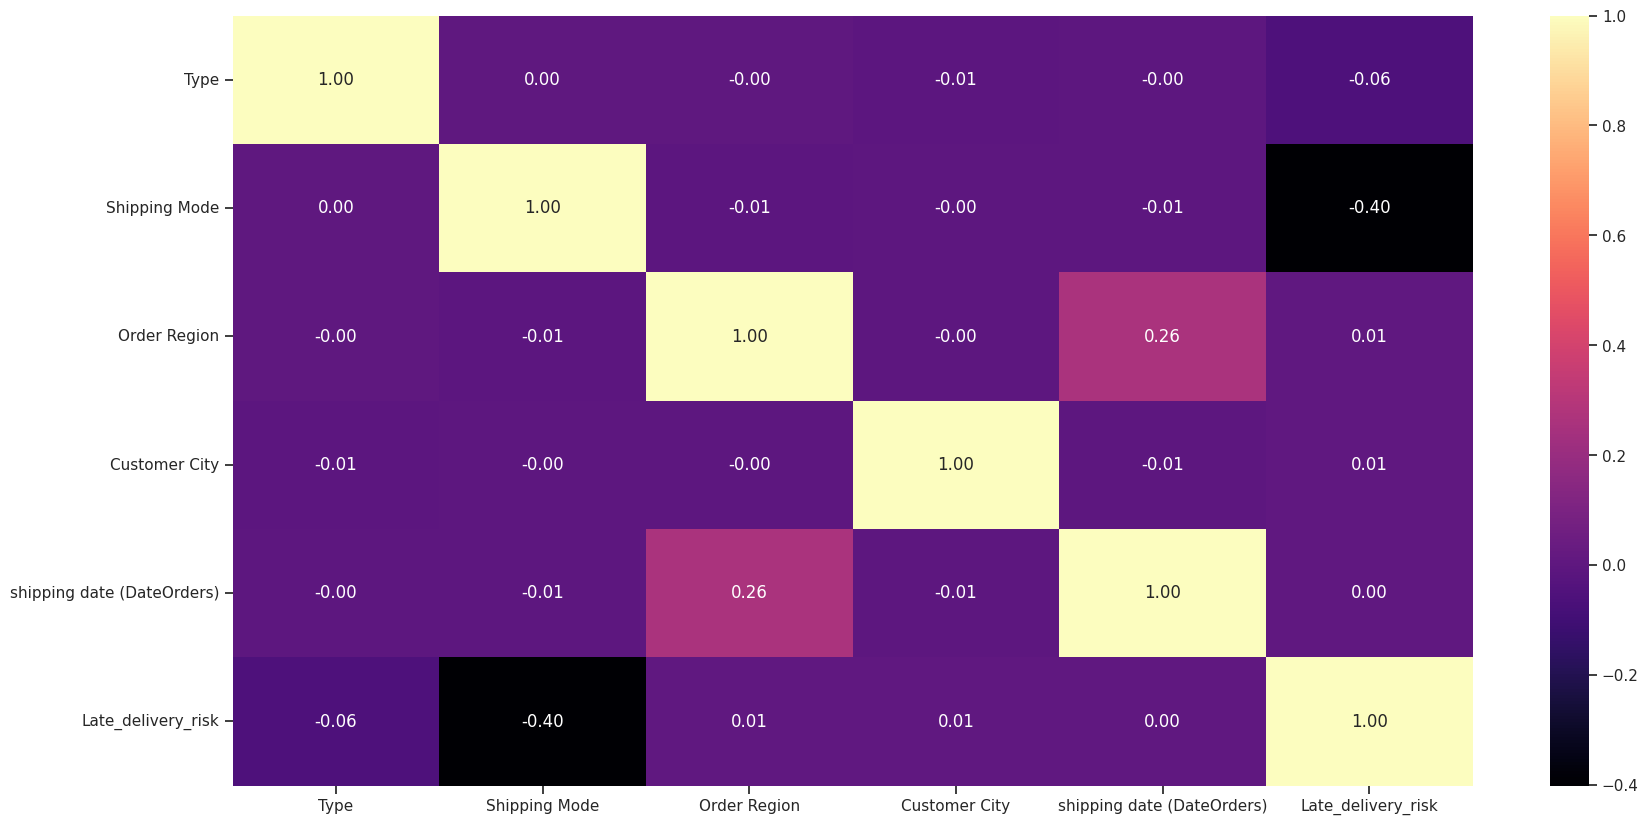

In [41]:
# Memvisualisasikan hubungan antara variabel-variabel dalam data

fig = plt.figure(figsize=(20,10))         # Membuat sebuah objek gambar (figure) dengan ukuran (width, height) sebesar (20, 10) unit
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [42]:
# Membagi dataset menjadi data pelatihan dan data pengujian.

X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state = 42)

In [43]:
# Proses pembuatan model menggunakan modul Scikit-Learn
pipeline_rf = Pipeline([('scaler', StandardScaler()),
                        ('RandomForestClassifer', RandomForestClassifier(criterion='gini', max_features='log2', n_estimators=300))])
model_rfl = pipeline_rf.fit(X_train, y_train)

In [ ]:
rfl_train_predict = pd.DataFrame({'actual' : y_train,
                                  'predicted' : model_rfl.predict(X_train)})
rfl_train_predict.head()

,actual,predicted
116587,1,1
36340,0,0
175763,1,1
96918,1,1
71197,1,1


In [ ]:
rfl_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

,actual,predicted
80120,1,1
19670,1,1
114887,0,0
120110,1,1
56658,0,0


In [ ]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  0.9474019499224463


In [ ]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rfl_test_predict.actual, rfl_test_predict.predicted))

ROC-AUC Score for train dataset :  1.0
ROC-AUC Score for validation dataset :  0.9469842068021261


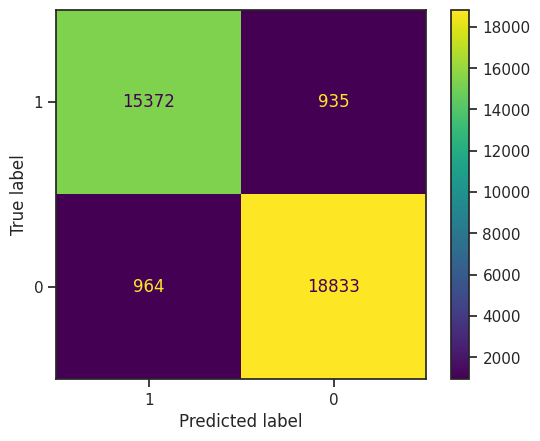

In [ ]:
confusion_matrix = metrics.confusion_matrix(rfl_test_predict.actual, rfl_test_predict.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])
cm_display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(rfl_test_predict.actual, rfl_test_predict.predicted, digits=4))

              precision    recall  f1-score   support

           0     0.9410    0.9427    0.9418     16307
           1     0.9527    0.9513    0.9520     19797

    accuracy                         0.9474     36104
   macro avg     0.9468    0.9470    0.9469     36104
weighted avg     0.9474    0.9474    0.9474     36104



In [ ]:
# Simpan pipeline dan model ke dalam file
joblib.dump(model_rfl, 'pipeline_rf_model.pkl')

['pipeline_rf_model.pkl']

# Memperkirakan Penjualan produk yang berbeda

In [ ]:
#Mengambil subset kolom-kolom tertentu dari DataFrame df
data_sales=df[['Type', 'Benefit per order', 'Sales per customer',
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',
           'Customer Id', 'Customer Segment',
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id',
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total',
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']]

In [ ]:
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales']

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,0,0,40,66,1,20649,0,...,609,114,47,0,78,78,62,0,27149,3
1,3,2272,2559,1,1,40,66,1,19386,0,...,609,114,47,0,78,78,62,0,2209,3
2,0,2293,2555,3,0,40,452,0,19385,0,...,609,114,47,0,78,78,62,0,1980,3
3,1,13638,2546,0,0,40,285,0,19384,2,...,609,114,47,0,78,78,62,0,1752,3
4,2,20599,2526,0,0,40,66,1,19383,1,...,609,114,47,0,78,78,62,0,1528,3


In [ ]:
#Pemilihan Fitur berdasarkan kepentinga
F_values, p_values  = f_regression(features, target)

In [ ]:
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [ ]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
20,Order Id,1165.171704,0.000
22,Order Item Discount,57166.125441,0.000
21,Order Item Cardprod Id,12782.968321,0.000
39,shipping date (DateOrders),142.652140,0.000
19,order date (DateOrders),128.461963,0.000
18,Order Customer Id,673.464036,0.000
27,Order Profit Per Order,13782.670150,0.000
15,Market,240.910781,0.000
28,Order Region,140.517795,0.000
29,Order State,27.929090,0.000


In [ ]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment'], dtype=object)

In [ ]:
#Membuat DataFrame baru dengan nama 'final_features' yang hanya berisi kolom-kolom yang terdaftar
final_features=features[['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment']]

In [ ]:
final_data=pd.concat([final_features, target], axis=1)

<Axes: >

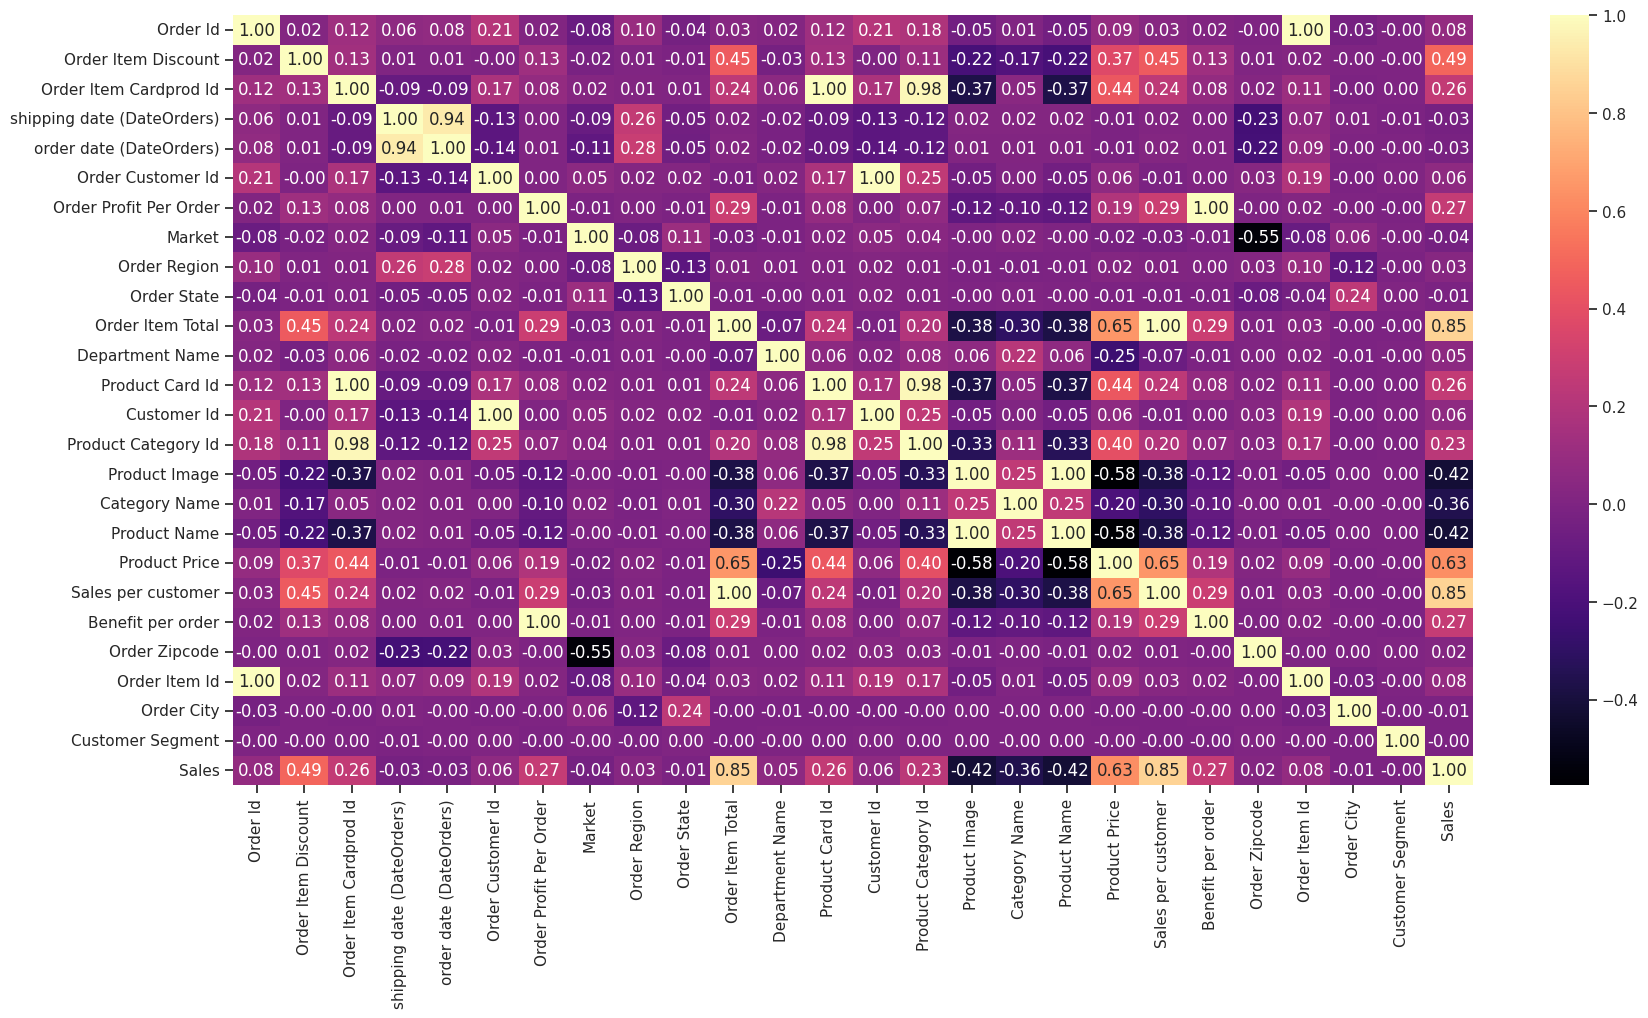

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [ ]:
pipeline_rf2 = Pipeline([('scaler', StandardScaler()),
                         ('RandomForestRegressor', RandomForestRegressor(criterion='squared_error', max_features='log2', n_estimators=300))])
model_rf2 = pipeline_rf2.fit(X_train, y_train)

In [ ]:
#Membuat sebuah DataFrame (tabel data) yang berisi 'actual' (nilai aktual) dan 'predicted' (nilai yang diprediksi)
rf2_train_predict = pd.DataFrame({'actual' : y_train,
                                  'predicted' : model_rf2.predict(X_train)})
rf2_train_predict.head()

,actual,predicted
99963,149.940002,150.023636
63538,210.850006,210.850006
6661,179.970001,179.970001
93913,129.990005,129.990005
90626,129.990005,129.990005


In [ ]:
#Membuat sebuah DataFrame (tabel data) yang berisi 'actual' (nilai aktual) dan 'predicted' (nilai yang diprediksi)
rf2_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rf2.predict(X_test)})
rf2_test_predict.head()

,actual,predicted
80120,199.990005,199.990005
19670,250.000000,249.499667
114887,249.899994,250.200661
120110,299.980011,299.980011
56658,119.970001,119.756868


In [ ]:
#Memprediksi nilai target (y) menggunakan model machine learning pada data pengujian (X_test).
predict = model_rf2.predict(X_test)

In [ ]:
# Evaluasi model dengan metrik-metrik
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict)

# Menampilkan hasil evaluasi
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.4364218240382268
Mean Squared Error (MSE): 20.642892917890876
Root Mean Squared Error (RMSE): 4.543445049507133
R-squared (R2): 0.9988341625610977


In [ ]:
# Save the preprocessing and model to files
joblib.dump(model_rf2, 'pipeline_rf_regresor_model.pkl')

['pipeline_rf_regresor_model.pkl']

In [ ]:
#Membuat grafik yang membandingkan data aktual (y_test) dengan data yang diprediksi (predict) dalam bentuk scatter plot.
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=predict, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))
fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')
fig.show()